Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\tapir\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.
C:\Users\tapir\AppData\Local\Temp\ipykernel_25588\3839202934.py:71: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(myquery,sql_connect)


   year  returning_cus_percentage
0  2011                 11.806543
1  2012                 11.796331
2  2013                 18.116269
3  2014                  9.889898


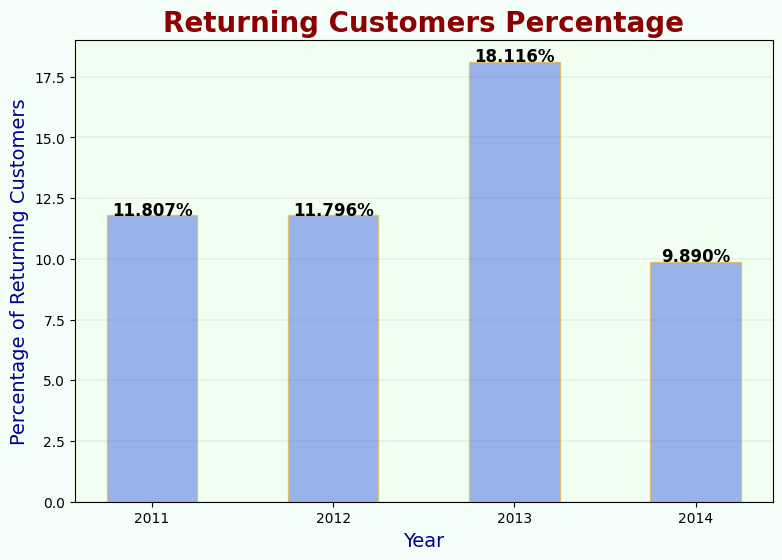

In [1]:
import pyodbc  # Importing a library that connects and executes SQL queries
import pandas as pd  # Importing Pandas for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization

#Creation a connection to the SQL server
sql_connect = pyodbc.connect(
    "DRIVER={SQL Server};"
    "SERVER=AVIPC\\SQLEXPRESS;"
    "DATABASE=AdventureWorks2019;"
    "Trusted_Connection=yes;")




myquery = """
with total_cus_filter as -- ( סינון ראשוני של כל הלקוחות שבשנה מסוימת רכשו יותר מפעם אחת ( לקוחות חוזרים 
(
select 
year(OrderDate) as year,
CustomerID
from Sales.SalesOrderHeader
group by year(OrderDate),CustomerID
having count(salesorderid) > 1
),


return_customer_cnt as --    ספירת לקוחות החוזרים בכל שנה
(
select
year,
count(customerid) as returning_customers
from total_cus_filter
group by year
),


final as ( -- צירוף תת שאילתה אשר מציגה את כמות הלקוחות של החברה בכל שנה
           --הצירוף נועד כדי להביא את כמות הלקוחות של החברה בכל שנה, על מנת לבצע חישוב סופי של אחוז הלקוחות החוזרים  
select 
return_customer_cnt.year,
return_customer_cnt.returning_customers,
total_cus

from return_customer_cnt

left join
(
select 
year(orderdate) as year ,
count(distinct CustomerID) as total_cus
from Sales.SalesOrderHeader
group by year(OrderDate)
) as total_customers

on return_customer_cnt.year = total_customers.year
)



select -- חישוב סופי של אחוז הלקוחות החוזרים בכל שנה
       -- הכפלתי את הלקוחות החוזרים ב1.0 כדי שנחלק מספר במספר ולא נקבל 0 בתוצאה,  ונאבד מידע
    year,
    (returning_customers * 1.00 / total_cus ) * 100 AS returning_cus_percentage
from final
order by year

"""


# Executing the query and storing the result in a DataFrame  
df = pd.read_sql(myquery,sql_connect)
print(df)


#Creating a new window
fig, ax = plt.subplots(figsize=(9, 6))

#Creating a bar chart and styling it
plt.bar(df['year'].astype(str), df['returning_cus_percentage'], color='royalblue', edgecolor='orange', width=0.5, alpha=0.5) 

#Creating a title and styling it
plt.title('Returning Customers Percentage', fontdict={"fontsize": 20, "fontweight": "bold", "color": "darkred"}) 

#Adding a label to the X-axis
plt.grid(axis='y', linewidth=0.2, color='grey', alpha=0.7)

plt.xlabel('Year', color="darkblue", fontsize=14) 

#Adding a label to the Y-axis
plt.ylabel('Percentage of Returning Customers', color="darkblue", fontsize=14) #Adding a label to the Y-axis

for i, value in enumerate(df['returning_cus_percentage']):
    
    plt.text(i, value, f"{value:.3f}%", ha='center', fontsize=12, fontweight='bold')


ax.set_facecolor("honeydew")  # Returns the object containing all parts of the graph area, not the whole window!

fig.set_facecolor("mintcream")

plt.show()
